In [80]:
import pandas as pd#Importing required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
glass=pd.read_excel('/content/glass.xlsx',sheet_name='glass')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Data Description:

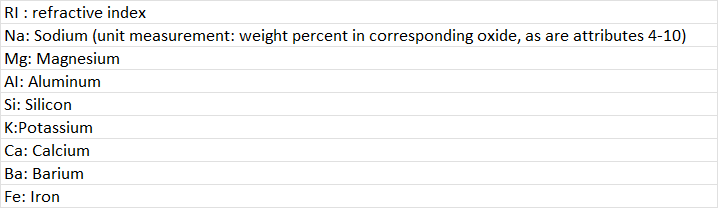

In [103]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [83]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [84]:
glass.isnull().sum()#Checking null Values

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [85]:
glass.duplicated().sum()#Checking duplicate values

1

In [86]:
glass[glass.duplicated()]#Checking duplicate rows

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [87]:
glass.drop_duplicates(inplace=True)#Deleting duplicate rows

In [113]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

colors = ['orange','blue', 'green', 'purple', 'red', 'pink', 'yellow', 'cyan']

# Assuming 'glass' is your DataFrame
for idx, column in enumerate(glass.describe().columns):
    fig = px.box(glass, y=column, title=f'Box Plot of {column}', color_discrete_sequence=[colors[idx % len(colors)]])
    fig.show()

In [90]:
for i in glass:#Outilers
    Q1 = glass[i].quantile(0.25)
    Q3 = glass[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data= glass[~((glass[i] < lower_limit) | (glass[i] > upper_limit))]
    print(data)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[196 rows x 10 columns]
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 0 to 184
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      184 non-null    float64
 1   Na      184 non-null    float64
 2   Mg      184 non-null    float64
 3   Al      184 non-null    float64
 4   Si      184 non-null    float64
 5   K       184 non-null    float64
 6   Ca      184 non-null    float64
 7   Ba      184 non-null    float64
 8   Fe      184 non-null    float64
 9   Type    184 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.8 KB


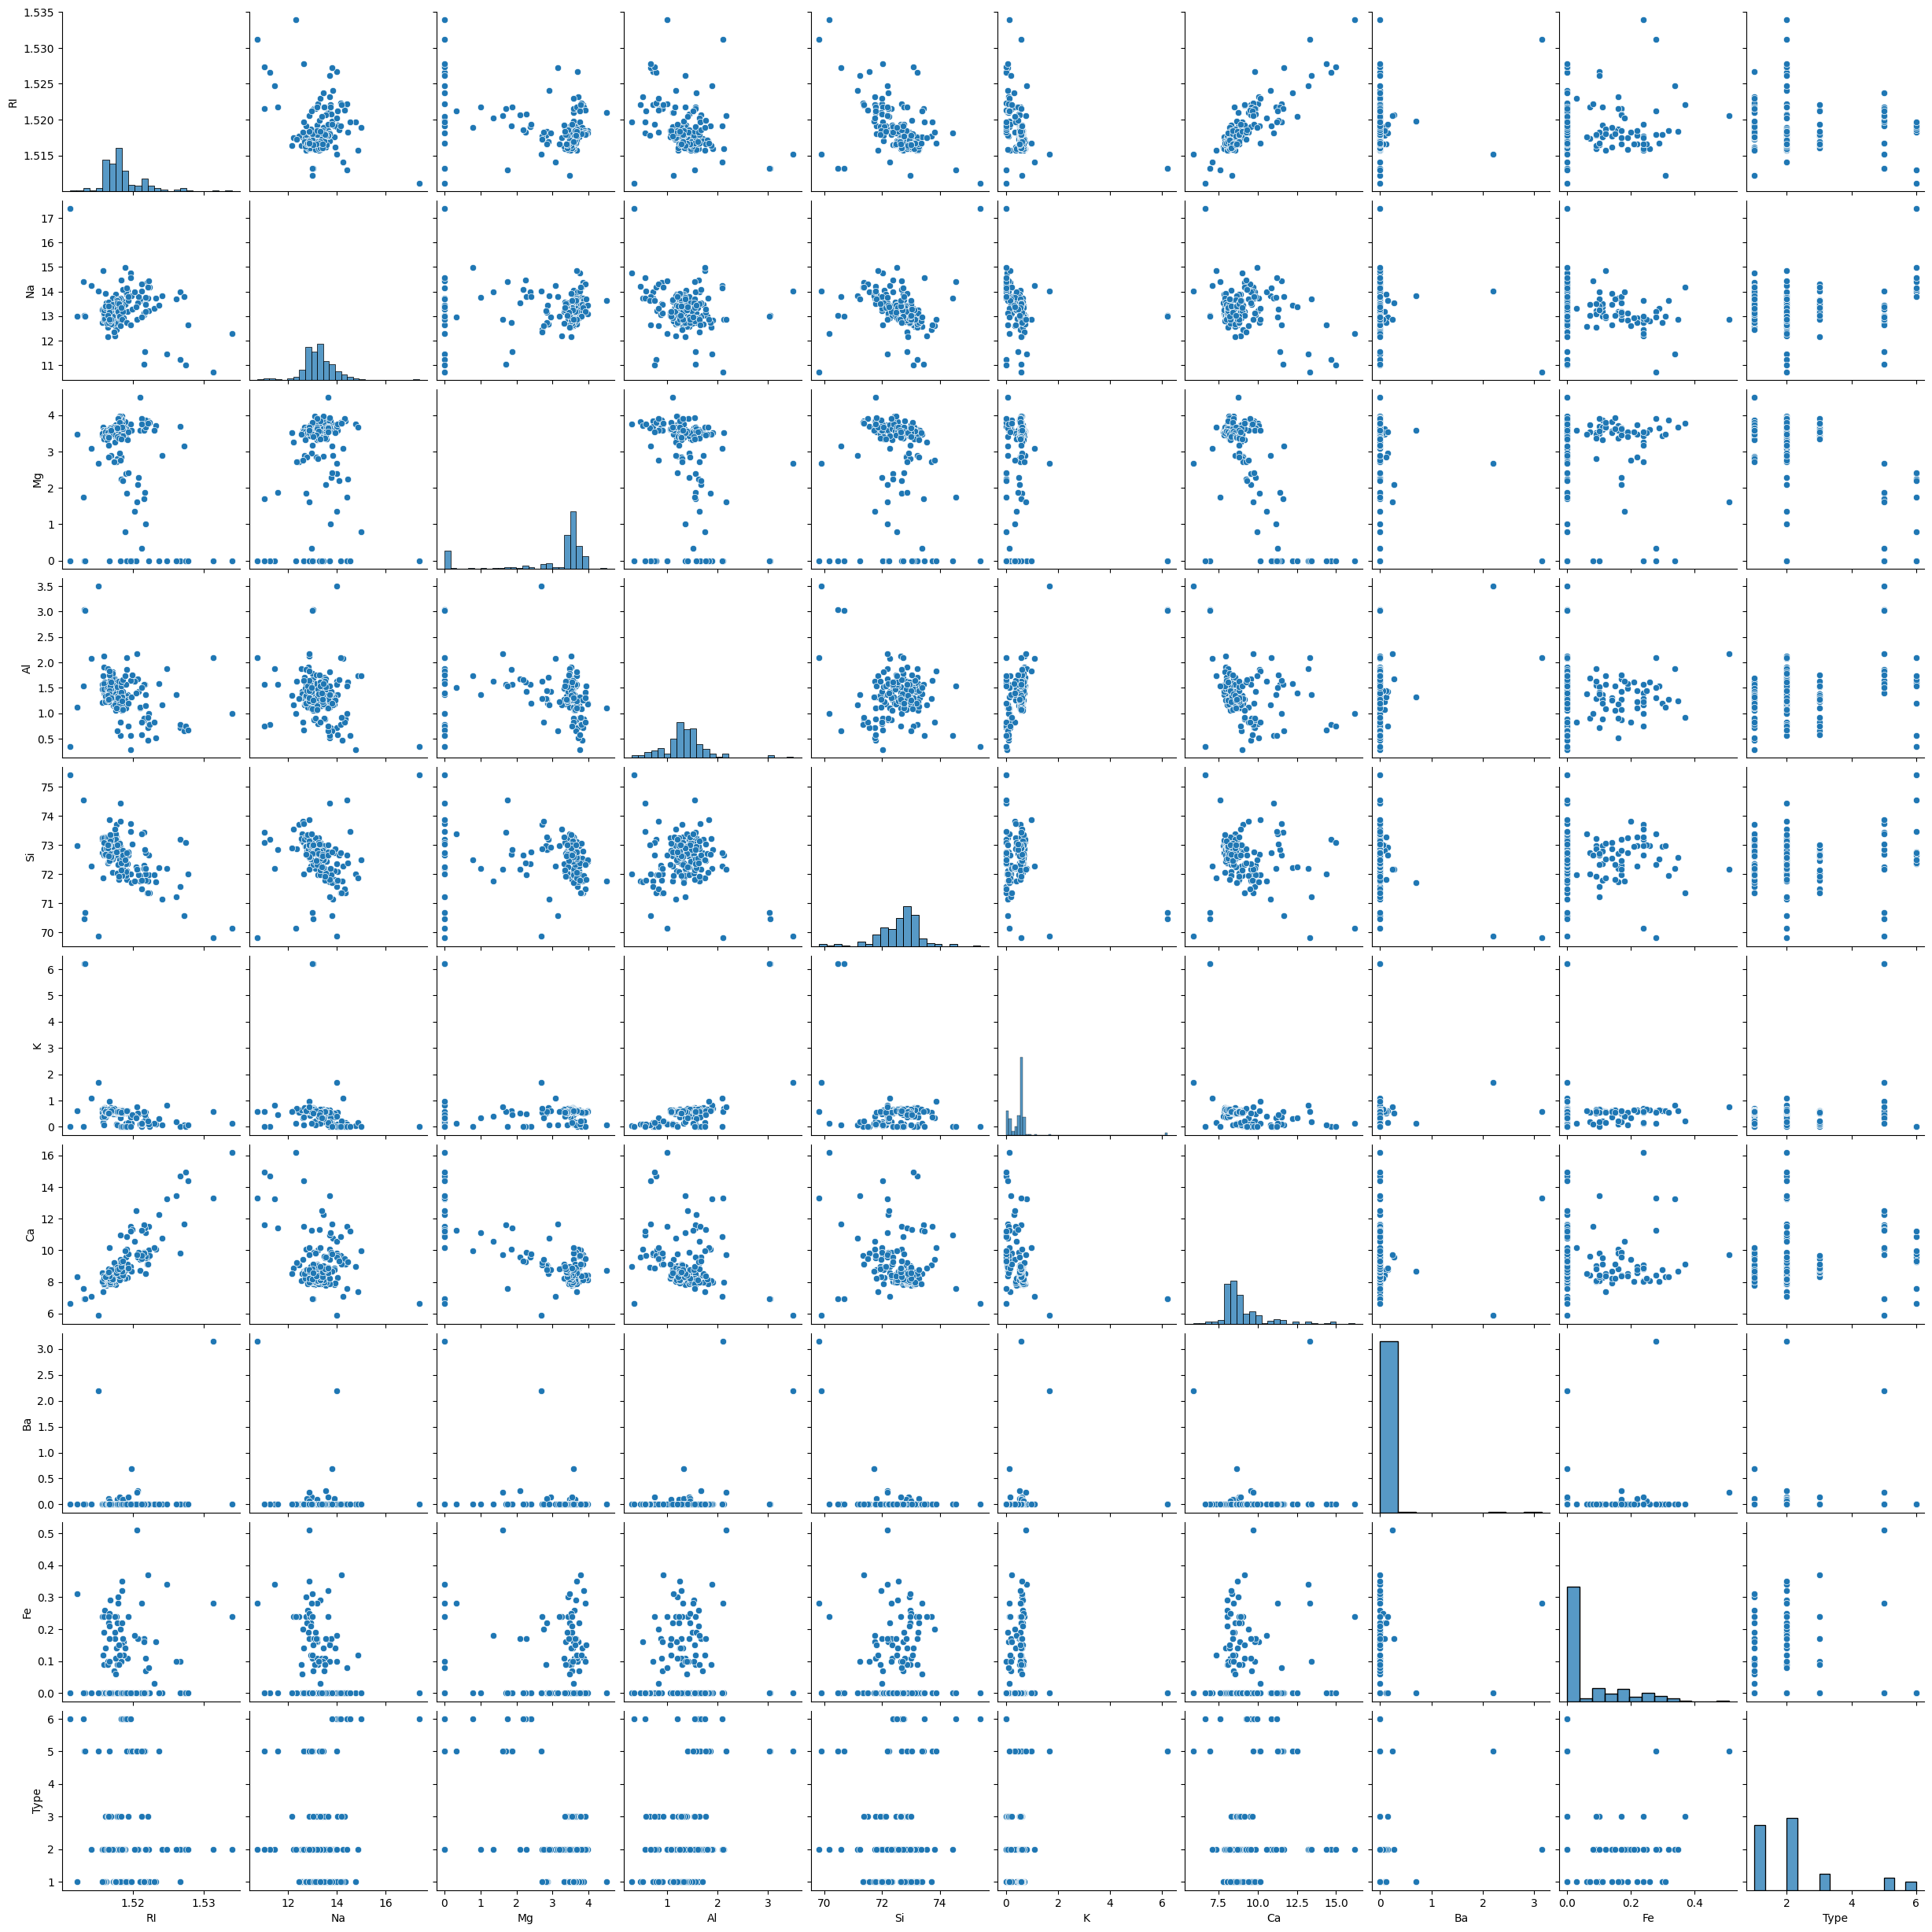

In [107]:
sns.pairplot(data)

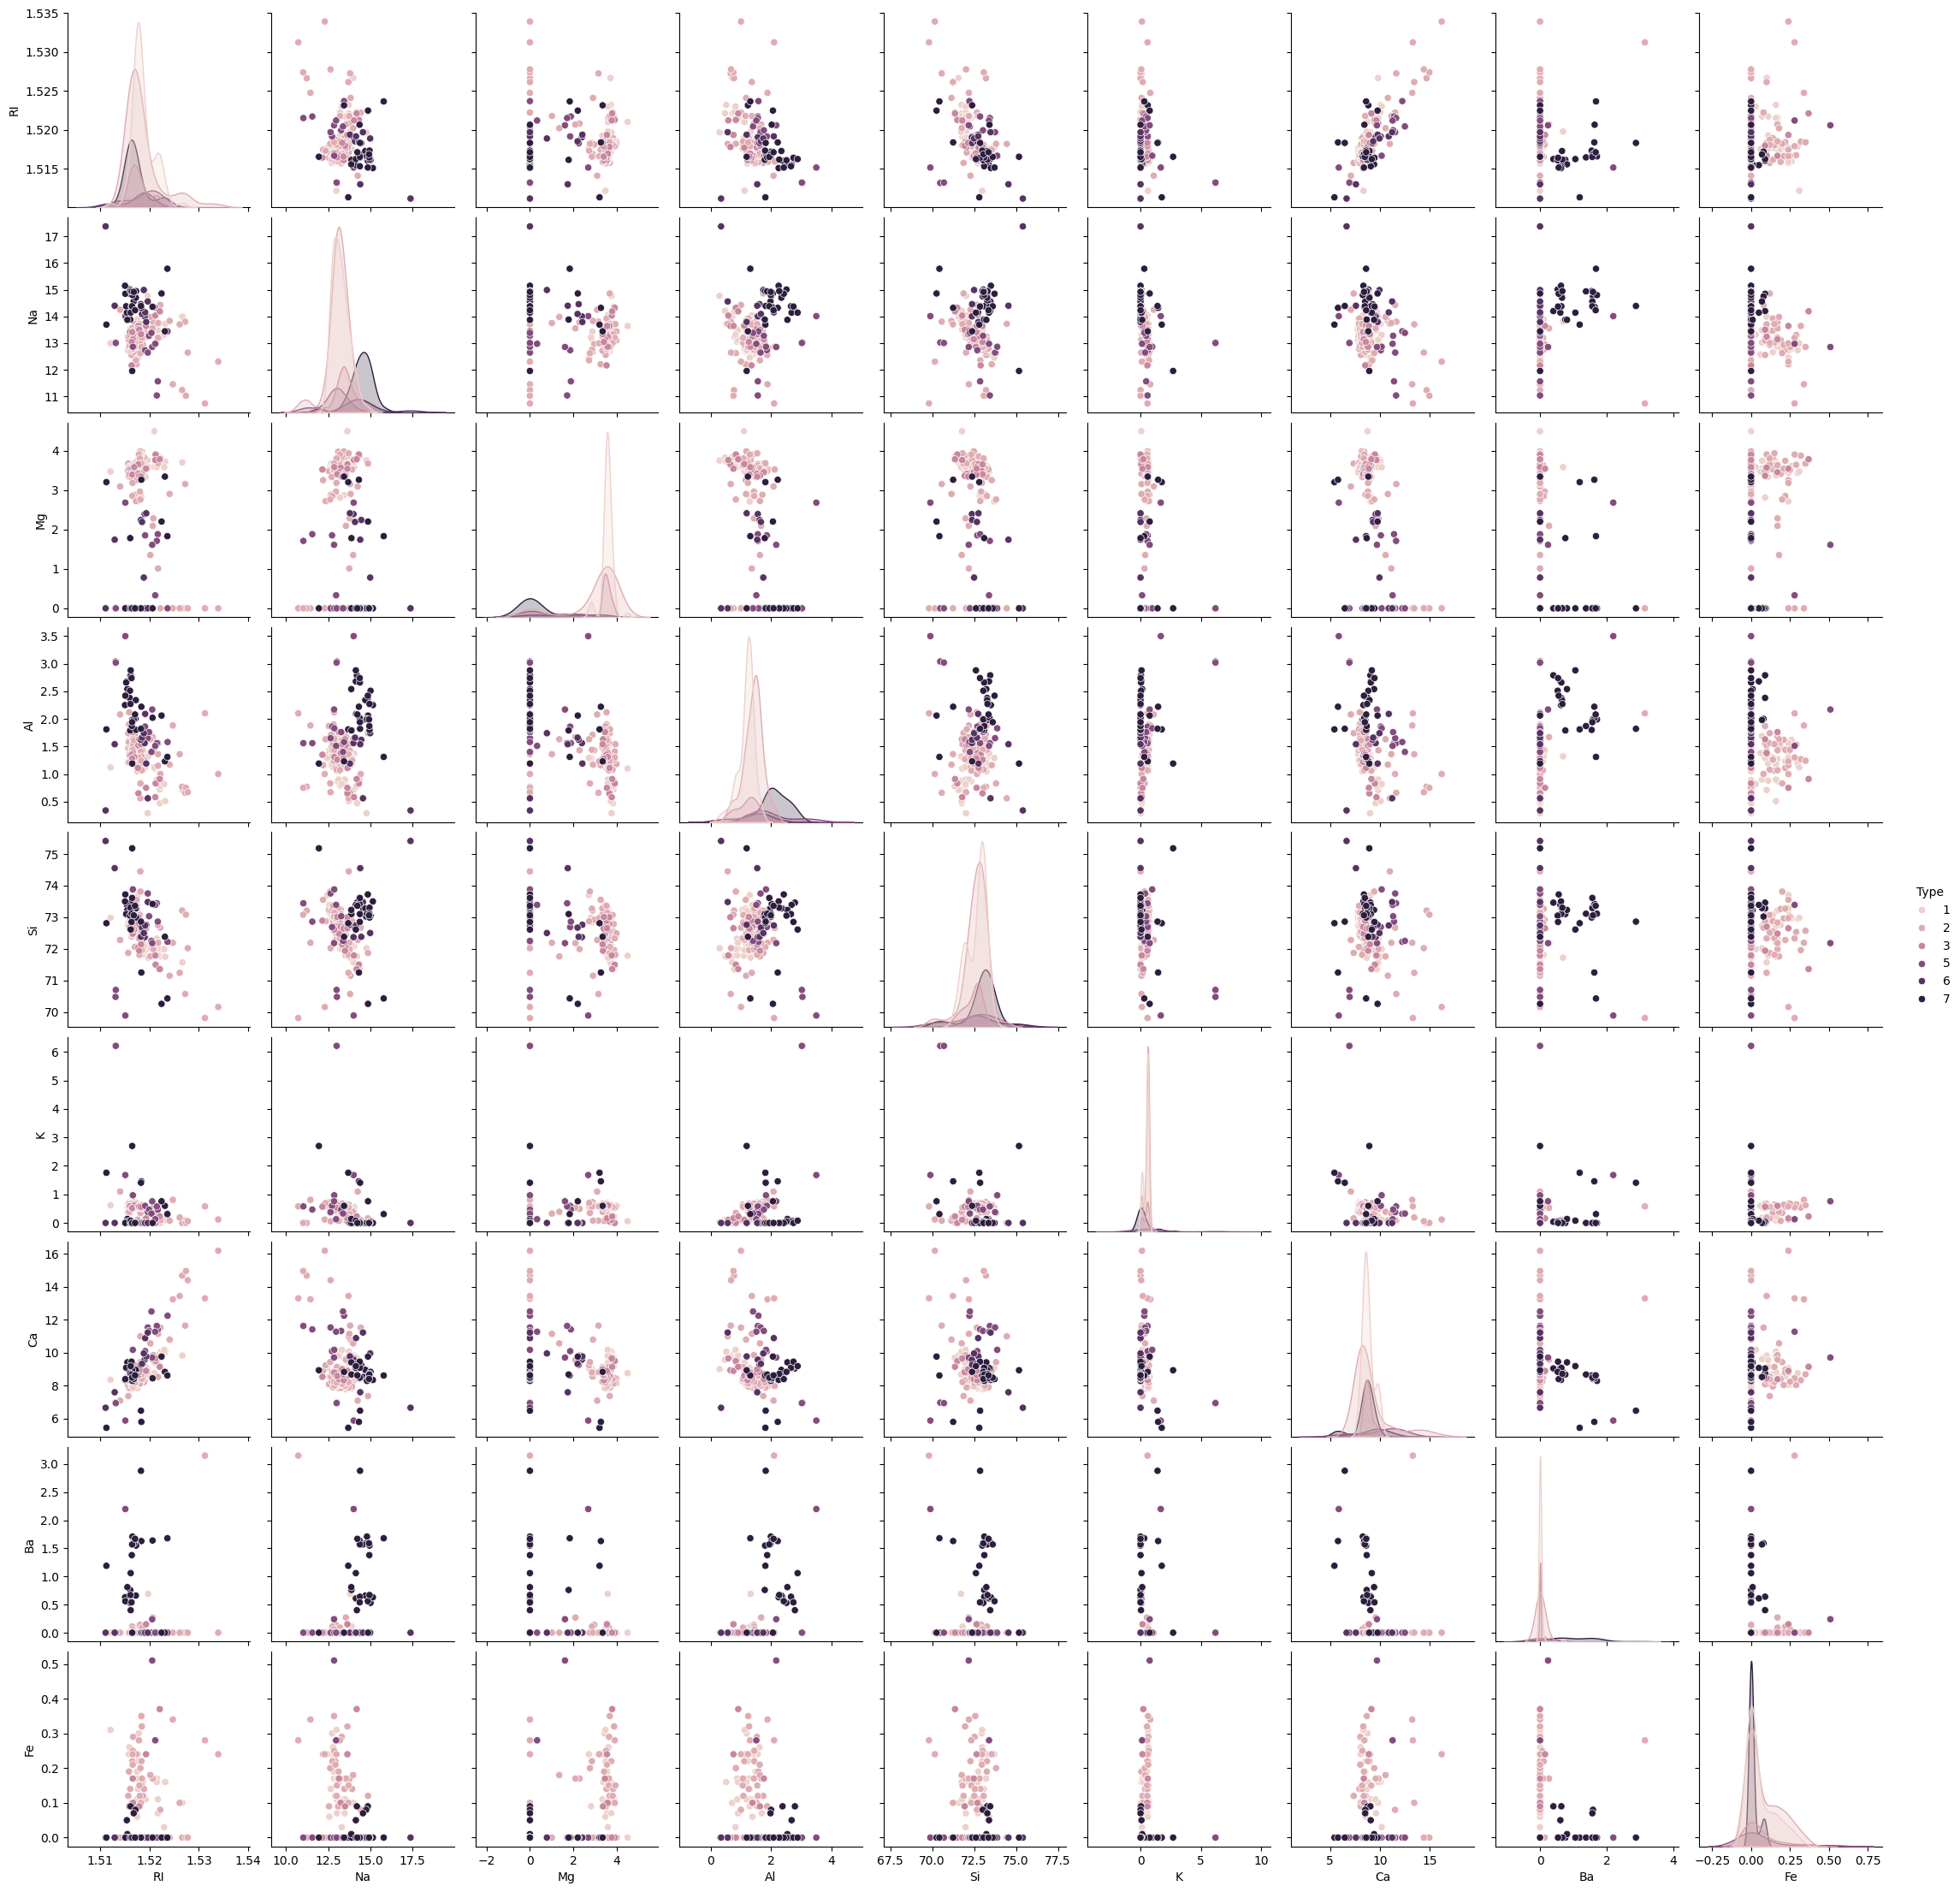

In [106]:
sns.pairplot(glass,hue='Type')#pairplot

<Axes: >

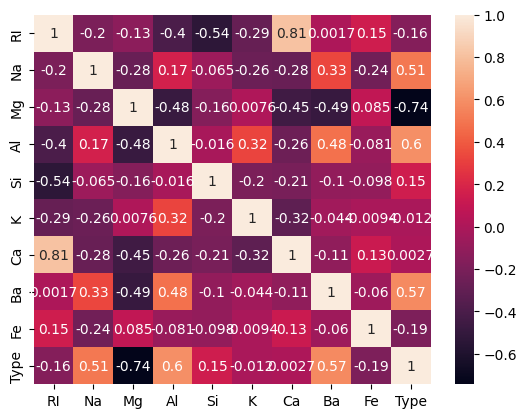

In [104]:
sns.heatmap(glass.corr(),annot=True)

In [116]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
correlation_matrix = glass.corr()

fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,x=correlation_matrix.columns, y=correlation_matrix.index,
    colorscale='Viridis',  zmin=-1, zmax=1,  colorbar=dict(title="Correlation")))

annotations = []
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        annotations.append(
            dict(
                x=correlation_matrix.columns[j],
                y=correlation_matrix.index[i],
                text=str(np.round(correlation_matrix.iloc[i, j], 2)),
                showarrow=False,
                font=dict(color="white" if correlation_matrix.iloc[i, j] < 0.5 else "black")))

fig.update_layout(
    title='Correlation Heatmap',annotations=annotations,xaxis_title='Features', yaxis_title='Features',template='plotly_dark')
fig.show()


In [14]:
glass.corr()#correlation

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [117]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


# 4: Random Forest Model Implementation


In [70]:
X=glass.drop('Type',axis=1)
y=glass['Type']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)#spliting the data into training and testing sets

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 9)
(43, 9)
(170,)
(43,)


In [74]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)

<class 'pandas.core.frame.DataFrame'> (170, 9)
<class 'pandas.core.series.Series'> (170,)


In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)#Initializing the random forest classifier
rf.fit(X_train,y_train)#Training the model

RandomForestClassifier(random_state=42)

In [67]:
Y_pred=rf.predict(X_test)#Predictions

In [68]:
Y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 6, 5, 7, 1, 1, 7, 1, 7,
       7, 7, 2, 5, 1, 1, 6, 1, 1, 2, 3, 2, 2, 7, 2, 3, 2, 2, 1, 2, 1])

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [55]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, Y_pred))

Confusion Matrix:
[[10  0  0  0  0  0]
 [ 4 10  0  1  0  0]
 [ 0  1  2  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  0  8]]


In [57]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       0.67      0.67      0.67        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.77        43
   macro avg       0.81      0.70      0.74        43
weighted avg       0.78      0.77      0.76        43



In [59]:
Accuracy_score=accuracy_score(y_test,Y_pred)
print("Accuracy Score:",Accuracy_score)

Accuracy Score: 0.7674418604651163


# Boosting with AdaBoost:

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model

AdaBoostClassifier(n_estimators=100, random_state=42)

In [63]:
ada_model.fit(X_train, y_train)# Fiting the model

AdaBoostClassifier(n_estimators=100, random_state=42)

In [64]:
ada_preds = ada_model.predict(X_test)# Predictions

In [65]:
# Evaluate the model
ada_accuracy = accuracy_score(y_test, ada_preds)
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")

AdaBoost Accuracy: 0.4186


 # Compare

In [66]:
print(f"Random Forest (Bagging) Accuracy: {Accuracy_score:.4f}")
print(f"AdaBoost (Boosting) Accuracy: {ada_accuracy:.4f}")

Random Forest (Bagging) Accuracy: 0.7674
AdaBoost (Boosting) Accuracy: 0.4186




---

**1. Explain Bagging and Boosting methods. How is it different from each other.**

Answer:

Bagging and Boosting are ensemble learning techniques used to improve the accuracy of machine learning models by combining multiple models.

**Bagging:**

 - Bagging is an ensemble technique that combines the predictions of multiple base models (often decision trees) trained independently on different subsets of the data. The subsets are generated through bootstrapping.

*  The most common implementation of Bagging is Random Forest, where multiple decision trees are trained on different random subsets of the data and features.


** Boosting:**

* Boosting is an ensemble technique that builds models sequentially. Each new model tries to correct the errors made by the previous models by focusing on the misclassified examples.

* Boosting adjusts the weights of incorrectly classified instances, so the next model pays more attention to those errors.

* The final prediction is a weighted sum of the predictions of all models. Models that perform better have higher weights.


*  Reduce both bias and variance. Boosting is particularly effective for improving weak models (classifiers with slightly better than random performance).


Summary:

1.Bagging reduces variance by training models independently on random samples and averaging their outputs.

2.Boosting reduces both bias and variance by training models sequentially, correcting the mistakes of previous models.




2. Explain how to handle imbalance in the data.

Answer:

These are several techniques to handle imbalanced datasets effectively:-

 1. Random Undersampling:

  * Randomly removes samples from the majority class to balance the dataset.

  * This reduces the number of samples from the dominant class so that both classes are equally represented.

  * Its reduces computational time and storage since the dataset is smaller.

2. Random Oversampling:
  
  * Randomly duplicates samples from the minority class to balance the dataset. This increases the representation of the minority class without losing information.

   * Helps prevent loss of information from the minority class.

3. SMOTE (Synthetic Minority Over-sampling Technique):

 * Generates synthetic samples for the minority class by interpolating between existing minority class samples.

 * It creates new, "synthetic" examples rather than duplicating existing ones.



